# Diederske grupe 
## Trenutno: Le $\mathcal L _{\text{rel}}$, $\mathcal L _{irr}$ moram še dodati
Študiramo (2d) upodobitve diederskih grup
 $D_{2n} = <r, s \mid r^n = s^2 = (rs)^2 = 1>$.

### $d\mathcal L_{\text{rel}}$
$$
 \mathcal L_{\text{rel}} = 
  \frac{1}{3}(||S^2 - I ||^2_F + ||R^n -I||^2_F + || (RS)^2 - I ||^2_F),
$$
kjer je $R=\rho(r)$ in $S = \rho(s)$.

Velja
$$
\frac{d}{dX}||X^n-I||_F^2=2\left (\sum\limits_{i=0}^{n-1}X^{n-i-1}(X^T)^n X^i  -nX^{n-1}  \right )^T 
$$
Za lažje računanje uvedemo
$$
Q(X,n) = \sum\limits_{i=0}^{n-1}X^{n-i-1}(X^T)^n X^i -nX^{n-1}
$$
Velja še 
$$
\frac{d}{dA}||(AB)^n-I||_F^2=2(B Q(AB, n))^T \text{ in } \frac{d}{dB}||(AB)^n-I||_F^2=2( Q(AB, n) A)^T.
$$ 


In [1]:
# definiraj grad_L
import numpy as np

# from numpy.linalg import matrix_power as pow
from numpy.linalg import norm


def pow(A, n):
    dim = A.shape[0]
    X = np.eye(dim)
    for i in range(n):
        X = X @ A
    return X


def Q(X, n):
    """
    Returns 1/2 * (  d/dX (||X^n - I||^2) )^T
    """
    dim = X.shape[0]
    ans = np.zeros(X.shape)
    for i in range(n):
        ans += pow(X, n - i - 1) @ pow(X.transpose(), n) @ pow(X, i)
    ans -= n * pow(X, n-1)
    return ans


def d_Lrel_dR(R, S, n):
    return (1 / 3) * 2 * Q(R, n).transpose() + 2 * (S @ Q(R @ S, 2)).transpose()


def d_Lrel_dS(R, S):
    return (1 / 3) * 2 * Q(S, 2).transpose() + 2 * (Q(R @ S, 2) @ R).transpose()


def Lrel(R, S, n):
    dim = R.shape[0]
    eye = np.eye(dim)
    return (1 / 3) * (norm(pow(R,n) - eye, ord='fro')**2 
                    + norm(pow(S,2) - eye, ord='fro')**2
                    + norm(pow(R@S,2) - eye, ord='fro') **2)

### $d \mathcal L_{\text{irr}}$
$$
 \mathcal L_{\text{irr}} =
 (|\chi|-1)^2
 \\= \left( 
    (\frac{1}{2n} \sum \limits_{i=0}^{n-1} ( |\text{tr}(R^i)|^2 + |\text{tr}(R^iS)|^2 )  ) -1
    \right )^2,
$$
kjer je $R=\rho(r)$, $S = \rho(s)$ in $|\chi| = \frac{1}{2n} \sum \limits_{i=0}^{n-1} ( |\text{tr}(R^i)|^2 + |\text{tr}(R^iS)|^2 )  )$
Velja
$$
\frac{d}{dR} = \frac{1}{n} (|\chi| -1)\left(\sum \limits_{i=1}^{n-1} 
\text{tr}(R^i) i R^{i-1} + \text{tr}(R^i S) i R^{i-1} S
\right)^T
$$
in 
$$
\frac{d}{dS} = \frac{1}{n} (|\chi| -1) \left(2\sum \limits_{i=0}^{n-1} \text{tr}(SR^i) R^i\right)^T
$$

In [2]:
def norm_chi(R, S, n):
    ans = 0
    for i in range(n):
        ans += np.abs(np.trace(pow(R, i))) ** 2
        ans += np.abs(np.trace(pow(R, i) @ S)) ** 2
    ans /= 2 * n
    return ans


def Lirr(R, S, n):
    return (norm_chi(R, S, n) - 1) ** 2


def d_Lirr_dR(R, S, n):
    dim = R.shape[0]
    ans = np.zeros((dim, dim))
    for i in range(1, n):
        ans += np.trace(pow(R, i)) *i * pow(R, i-1)
        ans += np.trace(pow(R, i) @ S) *i * (S @ pow(R, i-1) )
    ans = ans.transpose()
    ans *= (norm_chi(R, S, n)-1) / n
    return ans


def d_Lirr_dS(R, S, n):
    dim = R.shape[0]
    ans = np.zeros((dim, dim))
    for i in range(1, n):
        ans += np.trace(S @ pow(R, i)) * pow(R, i)
    ans = ans.transpose()
    ans *= 2 * (norm_chi(R, S, n) -1) / n
    return ans

In [3]:
S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])

In [4]:
# poženi solve_ivp
from scipy.integrate import solve_ivp
n= 3
dim = 2
t_max = 1
def neg_grad(t, z):
    R = np.reshape(z[:len(z)//2], (dim, dim))
    S = np.reshape(z[len(z)//2:], (dim, dim))

    dR = - d_Lrel_dR(R,S, n) - d_Lirr_dR(R,S, n)
    dS = - d_Lrel_dS(R, S) - d_Lirr_dS(R, S, n)

    dR = dR.flatten()
    dS =  dS.flatten()
    return np.concatenate((dR, dS), axis=None)

R0= np.random.rand(2,2)*10
#S0= np.random.rand(2,2)*10

S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])
S0 =S0 + np.random.normal(scale=0.1, size=(2,2))
R0 =R0 + np.random.normal(scale=0.1, size=(2,2))

S0 = S0.flatten()
R0 = R0.flatten()

P0 = np.concatenate((R0, S0), axis=None)


In [5]:
solution = solve_ivp(neg_grad, (0, t_max), P0)#, method='Radau')


In [6]:
def get_matrices(solution_y, index):
      z = solution_y.transpose()[index]
      R = np.reshape(z[:len(z)//2], (dim, dim))
      S = np.reshape(z[len(z)//2:], (dim, dim))
      return R, S
def get_characters(solution_y):
    solutions = solution_y.transpose()
    char_R = []
    char_S=[]
    for z in solutions:
            R = np.reshape(z[:len(z)//2], (dim, dim))
            S = np.reshape(z[len(z)//2:], (dim, dim))
            char_R.append(np.trace(R))
            char_S.append(np.trace(S))

    return char_R, char_S

charR, charS = get_characters(solution.y)

 35%|███▌      | 7/20 [00:01<00:02,  5.33it/s]/tmp/ipykernel_289653/2752525705.py:23: RuntimeWarning: overflow encountered in matmul
  ans += pow(X, n - i - 1) @ pow(X.transpose(), n) @ pow(X, i)
/tmp/ipykernel_289653/2752525705.py:23: RuntimeWarning: invalid value encountered in matmul
  ans += pow(X, n - i - 1) @ pow(X.transpose(), n) @ pow(X, i)
/tmp/ipykernel_289653/2447064800.py:5: RuntimeWarning: overflow encountered in scalar power
  ans += np.abs(np.trace(pow(R, i) @ S)) ** 2
100%|██████████| 20/20 [00:03<00:00,  5.44it/s]


Text(0.5, 1.0, 'Trajectory')

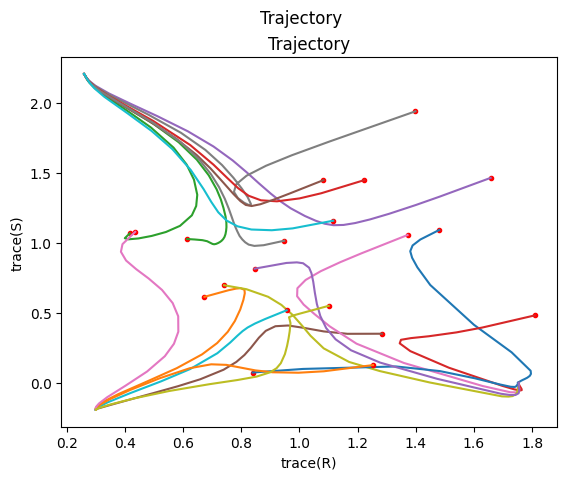

In [7]:
import matplotlib.pyplot as plt
from tqdm import tqdm
S0 = np.array([[0,1],[1,0]])
R0 = np.array([[np.cos(2*np.pi/3), -np.sin(2*np.pi/3)],
               [np.sin(2*np.pi/3), np.cos(2*np.pi/3)]])
fig, axs = plt.subplots(1)
fig.suptitle(f'Trajectory')

t_max=4
sample_size = 20
for _ in tqdm(range(sample_size), total = sample_size):
    P0 = np.random.rand((8))
   # print(P0)
    solution = solve_ivp(neg_grad, (0, t_max), P0)#, method='Radau')
    charR, charS = get_characters(solution.y)



    # plot initial step
    axs.plot(charR[0], charS[0], 'ro', label='Initial point', markersize=3)
   # axs.plot(1, 0, 'go', label='rho_k', markersize=2)

    axs.plot(charR, charS)

#for index, (cR, cS) in enumerate(zip(charR, charS)):
#    axs.plot(cR, cS, color=cmap(cmap_norm(solution.t[index])), lw=2)

axs.set_xlabel('trace(R)')
axs.set_ylabel('trace(S)')
#axs.legend()
axs.set_title('Trajectory')







### Loss function and grids
Naj bosta 
$$
R = \begin{bmatrix} a & b \\ c & d
\end{bmatrix}, \quad 
S = \begin{bmatrix} x & y\\ z & w
\end{bmatrix}
$$ 
realni matriki. Za prikaz rezultatov preizušam različne metode projekcij.

### $a = d$, $x = w$
Omejimo se na matrike oblike $R = \begin{bmatrix} a & b \\ c & a
\end{bmatrix}, \quad 
S = \begin{bmatrix} x & y\\ z & x
\end{bmatrix}$. Za fiske $b, c, y, z$ jih parametriziram s karakterjem.

In [8]:
def loss(R, S, n):
    return Lirr(R, S, n) + Lrel(R, S, n)

def char_to_semi_diag(char, b, c):
    a = char /2
    return np.array([[a, b], [c, a]])

In [9]:
char_to_semi_diag(-1.0, 2,1)

array([[-0.5,  2. ],
       [ 1. , -0.5]])

In [15]:
import plotly.graph_objects as go
n = 3


resolution = 100
min_param = -1
max_param = 1
charR = np.linspace(min_param, max_param, resolution)
charS = np.linspace(min_param, max_param, resolution)
charR, charS = np.meshgrid(charR, charS)

#Todo interactive plot
b = 1.
c = 1.
y = 0.
z = 0.



fig = go.Figure()

# Add traces, one for each slider step
for b in tqdm(np.linspace(-2, 2, 20), total=20):
    # get surface for this b 
    surface = np.zeros(shape=charR.shape)
    for row in range(resolution):
        for column in range(resolution):
            # collect matrices 
            R = char_to_semi_diag(charR[row][column], b, c)
            S = char_to_semi_diag(charS[row][column], y, z)
            # get loss
            surface[row][column] = loss(R, S, n)
    # add plot
    fig.add_trace(

        go.Surface(
            visible=False,
            name="b  = " + str(b),
            z = surface,
            x=charR,
            y=charS)
            
            )

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:38<00:00,  1.95s/it]


NameError: name 'x' is not defined

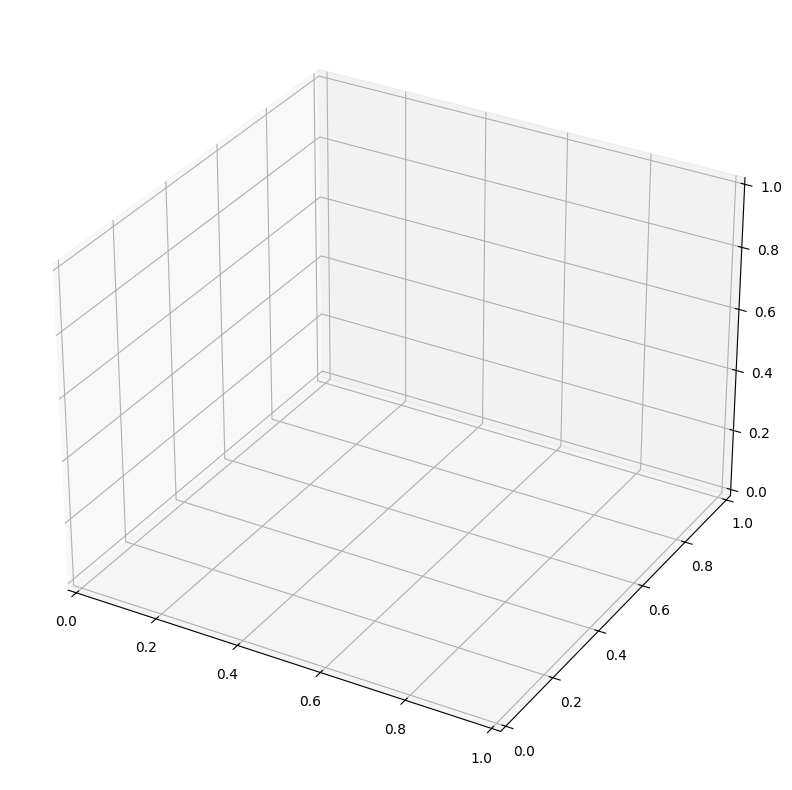